#    Heart Disease Predictor



---



---



*Follow these steps to run this notebook in Google Colaboratory.

1.   From the menu above, click Runtime
2.   Click Run all



---



In [25]:
# Model imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
# GUI import
import ipywidgets as widgets

In [27]:
# Charting imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Here we download the Personal Key Indicators of Heart Disease dataset and parse it. 

---



In [28]:
url = "https://raw.githubusercontent.com/FlutterDoctor/heartData/main/heart_2020_cleaned.csv"
heart_data = pd.read_csv(url)

In [29]:
chart_data = heart_data

We use the .head() and .tail() methods to check the first and last 5 lines in the CSV for any obvious mistakes in our data. 

---



In [30]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [31]:
heart_data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


Now we want to inspect the data. We use .shape to identify how many rows and columns there are.

---



In [32]:
heart_data.shape # Number of rows and columns

(319795, 18)

It's important to check each column for null data to avoid problems when building our machine learning method. 

---



In [33]:
heart_data.isnull().sum() # Looking for any null data

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [34]:
heart_data.describe() # Getting statistical measures

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Below is a descriptive chart that shows how many people report having or not having heart disease from the dataset.

---


---



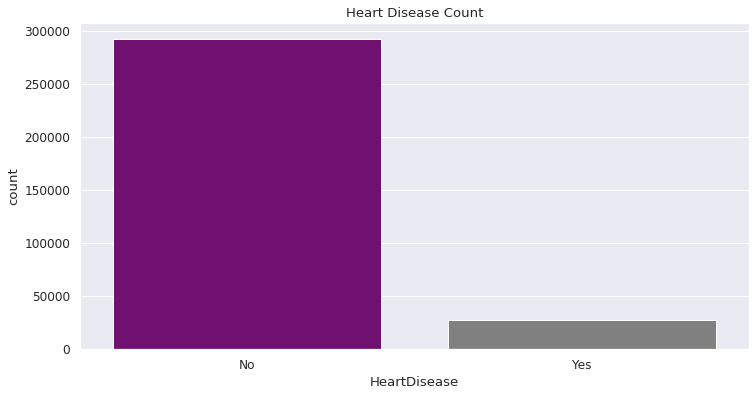

In [35]:
chart_palette = ['purple', 'grey']
plt.figure(figsize=(12,6));
plt.title('Heart Disease Count');
sns.countplot(data=chart_data, x='HeartDisease', palette=chart_palette, order=chart_data['HeartDisease'].value_counts().index)

Listed below are 12 descriptive pie charts with categorical data for each variable.

---



---



In [36]:
fig = make_subplots(
    rows=6, cols=2, subplot_titles=("Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],],
)

pallete = ['purple', 'orange', 'green', 'blue']


fig.add_trace(go.Pie(labels=np.array(chart_data['Smoking'].value_counts().index),
                     values=[x for x in chart_data['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=pallete),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(chart_data['AlcoholDrinking'].value_counts().index),
                     values=[x for x in chart_data['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(chart_data['Stroke'].value_counts().index),
                     values=[x for x in chart_data['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(chart_data['DiffWalking'].value_counts().index),
                     values=[x for x in chart_data['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=pallete),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(chart_data['Sex'].value_counts().index),
                     values=[x for x in chart_data['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=pallete),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(chart_data['Race'].value_counts().index),
                     values=[x for x in chart_data['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(chart_data['PhysicalActivity'].value_counts().index),
                     values=[x for x in chart_data['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=pallete),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(chart_data['Diabetic'].value_counts().index),
                     values=[x for x in chart_data['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(chart_data['GenHealth'].value_counts().index),
                     values=[x for x in chart_data['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=pallete),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(chart_data['Asthma'].value_counts().index),
                     values=[x for x in chart_data['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(chart_data['KidneyDisease'].value_counts().index),
                     values=[x for x in chart_data['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(chart_data['SkinCancer'].value_counts().index),
                     values=[x for x in chart_data['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=pallete),
              row=6, col=2)


fig.update_layout(height=2000, width=1000, font=dict(size=12), showlegend=False)
fig.show()

The correlation matrix below shows us how each variable relates to each other. 

---



In [37]:
correlation_matrix = px.imshow(chart_data[[	'HeartDisease',	'BMI',	'Smoking',	'AlcoholDrinking',	'Stroke',	'PhysicalHealth',	'MentalHealth',	'DiffWalking',	'Sex',	'AgeCategory',	'Race',	'Diabetic',	'PhysicalActivity',	'GenHealth',	'SleepTime',	'Asthma',	'KidneyDisease',	'SkinCancer']].corr(),color_continuous_scale="Purples")
correlation_matrix.update_layout(height=680, width=680)
correlation_matrix.show()

This plot below demonstrates the correlation between higher BMI numbers and higher heart disease counts. 


*   Orange = Heart Disease
*   Purple = No Heart Disease




---



Text(0.5, 1.0, 'Distribution of BMI')

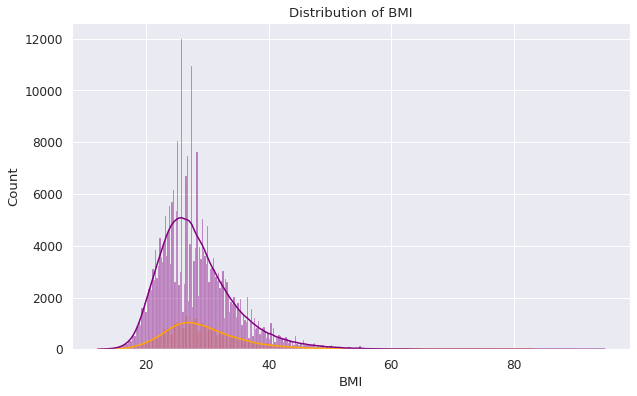

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data=chart_data[chart_data['HeartDisease']=='Yes'],x='BMI',kde=True,color='orange')
sns.histplot(data=chart_data[chart_data['HeartDisease']=='No'],x='BMI',kde=True,color='purple')
plt.title('Distribution of BMI')

From the chart below, we can infer that as a person ages, they are more likely to have heart disease
Orange = Heart Disease
Purple = No Heart Disease

---



Text(0.5, 1.0, 'Distribution of age')

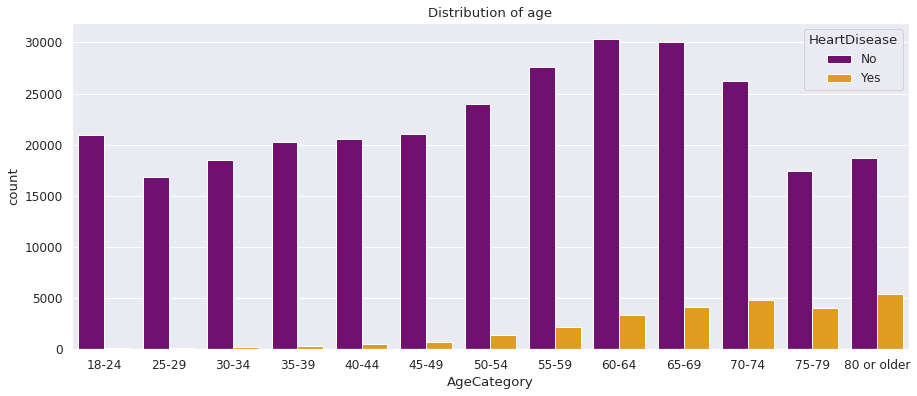

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(data=chart_data.sort_values(by='AgeCategory'),x='AgeCategory',hue=chart_data['HeartDisease'],palette=['purple', 'orange'])
plt.title('Distribution of age')

The next two code blocks convert the qualitative values to quantitative values so the machine learning algorithm can work properly.


---



In [40]:
# Transform categorical data to numerical Yes = 1 and No = 0 
yes_no_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                       'Asthma', 'KidneyDisease', 'SkinCancer']
yes_no_values = {'No':0, 'Yes':1}
for i in range(0, len(yes_no_columns)):
    heart_data[yes_no_columns[i]] = heart_data[yes_no_columns[i]].replace(yes_no_values)


In [41]:
heart_data['Race'].replace({'White':2,'Black':3,'Asian':4,'American Indian/Alaskan Native':5,'Hispanic':6,'Other':7},inplace=True)
sex = {'Female':0, 'Male':1}
heart_data['Sex'] = heart_data['Sex'].replace(sex)

ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
heart_data['AgeCategory'] = heart_data['AgeCategory'].replace(ageCategory)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
heart_data['GenHealth'] = heart_data['GenHealth'].replace(genHealth)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
heart_data['Diabetic'] = heart_data['Diabetic'].replace(diabetic)

The next code block separates the data into independent and dependent variables.

---



In [42]:
# independent variables
X = heart_data.iloc[:,1:].values
# dependent variable
Y = heart_data.iloc[:,0].values

The code below separates the data into training and test sections. We do this so we can test the accuracy of the model.


---



In [43]:
# Split the data into training and test sections.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Then we print out the shape of the data to verify it is how we want it. 


---



In [44]:
print(X.shape, X_train.shape, X_test.shape)

(319795, 17) (255836, 17) (63959, 17)


We now set up the Random Forest machine learning algorithm, train the model, run the predictions, and calculate the confusion matrix.


---



In [45]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini',n_estimators=56,max_depth=10,max_features='log2',min_samples_split=5,min_samples_leaf=1)
model.fit(X_train, Y_train)
rf_prediction = model.predict(X_test)

print('Prediction accuracy: ',accuracy_score(Y_test,rf_prediction))

Prediction accuracy:  0.916180678247002


Here is the confusion matrix showing actual versus predicted values. 


---



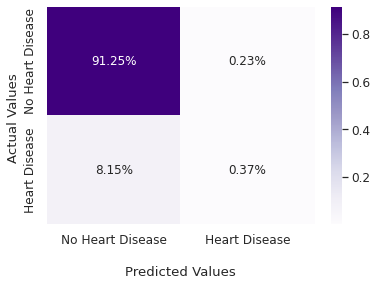

In [46]:
from sklearn.metrics import confusion_matrix
rf_confusion_matrix = confusion_matrix(Y_test,rf_prediction)
df_cm = pd.DataFrame(rf_confusion_matrix/np.sum(rf_confusion_matrix), range(2), range(2))
sns.set(font_scale=1.1) # Label size
cm_chart = sns.heatmap(df_cm, annot=True,fmt='.2%', annot_kws={"size": 12}, cmap='Purples') 

cm_chart.set_xlabel('\nPredicted Values')
cm_chart.set_ylabel('Actual Values ');

cm_chart.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
cm_chart.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

plt.show()

Below is the function that the heart disease form will call to make individual predictions.


---



In [47]:
def predict_heart_disease(bmi, smoking, alcohol_drinking, stroke, physical_health, mental_health, diff_walking, sex, age, race, diabetic, physical_activity, gen_health, sleep_time, asthma, kidney_disease, skin_cancer):
    try: 
        bmi_res = float(str(bmi).strip())
        smoking_res = 1 if str(smoking).strip() == "Yes" else 0
        alcohol_res = 1 if str(alcohol_drinking).strip() == "Yes" else 0
        stroke_res = 1 if str(stroke).strip() == "Yes" else 0
        physical_health_res = int(physical_health)
        mental_health_res = int(mental_health)
        diff_walking_res = 1 if str(diff_walking).strip() == "Yes" else 0
        sex_res = 1 if str(sex).strip() == "Male" else 0
        age_res = 0 if str(age) == "18-24" else 1 if str(age) == "25-29" else 2 if str(age) == "30-34" else 3 if str(age) == "35-39" else 4 if str(age) == "40-44" else 5 if str(age) == "45-49" else 6 if str(age) == "50-54" else 7 if str(age) == "55-59" else 8 if str(age) == "60-64" else 9 if str(age) == "65-69" else 10 if str(age) == "70-74" else 11 if str(age) == "75-79" else 12 
        race_res = 2 if str(race).strip() == "White" else 3 if str(race).strip() == "Black" else 4 if str(race).strip() == "Asian" else 5 if str(race).strip() == "American Indian/Alaskan Native" else 6 if str(race).strip() == "Hispanic" else 7
        diabetic_res = 1 if str(diabetic).strip() == "Yes" else 0
        physical_activity_res = 1 if str(physical_activity).strip() == "Yes" else 0
        gen_health_res = 0 if str(gen_health).strip() == "Poor" else 1 if str(gen_health).strip() == "Fair" else 2 if str(gen_health).strip() == "Good" else 3 if str(gen_health).strip() == "Very good" else 4
        sleep_time_res = int(sleep_time)
        asthma_res = 1 if str(asthma).strip() == "Yes" else 0
        kidney_disease_res = 1 if str(kidney_disease).strip() == "Yes" else 0
        skin_cancer_res = 1 if str(skin_cancer).strip() == "Yes" else 0


        input_data = (bmi_res, smoking_res, alcohol_res, stroke_res, physical_health_res, mental_health_res, diff_walking_res, sex_res, age_res, race_res, diabetic_res, physical_activity_res, gen_health_res, sleep_time_res, asthma_res, kidney_disease_res, skin_cancer_res)

        # Transform data to a numpy array.
        input_data_as_numpy_array= np.asarray(input_data)

        # reshape numpy array to work in predict().
        input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

        individual_prediction = model.predict(input_data_reshaped)

        if (individual_prediction[0]== 0):
            #print("The Person does not have a Heart Disease.")
            return "This person does not have a Heart Disease."
        elif (individual_prediction[0]== 1):
           # print("The Person has Heart Disease.")
            return "This Person has Heart Disease."
    


    except Exception as e:
        print("predict_heart_disease function error: " + e)
        return "We were unable to make a prediction. Please check your inputs and try again."

Below is the heart disease prediction form. Use the form to predict if a person has heart disease.


---







In [48]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, FloatSlider,Button
from IPython.display import display

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)
bmi = FloatSlider(min=8, max=60)
smoking = Dropdown(options=['Yes', 'No',])
drinking = Dropdown(options=['Yes', 'No',])
stroke = Dropdown(options=['Yes', 'No',])
physical_health = IntSlider(min=0, max=30)
mental_health = IntSlider(min=0, max=30)
walking = Dropdown(options=['Yes', 'No',])
sex = Dropdown(options=['Female', 'Male',])
age = Dropdown(options=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older',])
race = Dropdown(options=['White','Black','Asian','American','Indian/Alaskan Native','Hispanic','Other',])
diabetic = Dropdown(options=['Yes', 'No',])
physical_activity = Dropdown(options=['Yes', 'No',])
general_health = Dropdown(options=['Poor','Fair','Good','Very good','Excellent',])
sleep = IntSlider(min=0, max=24)
asthma = Dropdown(options=['Yes', 'No',])
kidney = Dropdown(options=['Yes', 'No',])
skin_cancer = Dropdown(options=['Yes', 'No',])

        
predict_button = Button(description='Predict',disabled=False,icon='heart',)
output = widgets.Output()
button_box = Box([predict_button])
form_items = [
    Box([Label(value='Body Mass Index (BMI)'),bmi],layout=form_item_layout),
    Box([Label(value='Have you smoked over 100 cigarettes in your lifetime?'),smoking], layout=form_item_layout),
    Box([Label(value='Do you drink more than 14(adult men) or 7(adult women) drinks per week?'),drinking], layout=form_item_layout),
    Box([Label(value='Have you ever had a stroke?'),stroke], layout=form_item_layout),
    Box([Label(value='How many days during the past 30 days was your physical health not good?'), physical_health], layout=form_item_layout),
    Box([Label(value='How many days during the past 30 days was your mental health not good?'),mental_health], layout=form_item_layout),
    Box([Label(value='Do you have serious difficulty walking or climbing stairs?'),walking], layout=form_item_layout),
    Box([Label(value='Sex'),sex], layout=form_item_layout),
    Box([Label(value='Age'),age], layout=form_item_layout),
    Box([Label(value='Race'),race], layout=form_item_layout),
    Box([Label(value='Have you ever been told you were diabetic?'),diabetic], layout=form_item_layout),
    Box([Label(value='Have you done physical activity or exercise during the past 30 days other than your regular job?'),physical_activity], layout=form_item_layout),
    Box([Label(value='Would you say in general that your health is'),general_health], layout=form_item_layout),
    Box([Label(value='On average, how many hours of sleep do you get in a 24-hour period?'), sleep], layout=form_item_layout),
    Box([Label(value='Have you ever been told you had asthma?'),asthma], layout=form_item_layout),
    Box([Label(value='Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?'),kidney], layout=form_item_layout),
    Box([Label(value='Have you ever been told you had skin cancer?'),skin_cancer], layout=form_item_layout),
    button_box

]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='85%'
))

def on_button_clicked(b):
    with output:
        print(predict_heart_disease(bmi.value, smoking.value, drinking.value, stroke.value, physical_health.value, mental_health.value, walking.value, sex.value, age.value, race.value, diabetic.value, physical_activity.value, general_health.value, sleep.value, asthma.value, kidney.value, skin_cancer.value))
        
print("Heart Disease Predictor")
predict_button.on_click(on_button_clicked)

display(form, output)


Heart Disease Predictor


Box(children=(Box(children=(Label(value='Body Mass Index (BMI)'), FloatSlider(value=8.0, max=60.0, min=8.0)), …

Output()